In [1]:
import Ticker_info
import Indicators
import Strategy
import Backtest

In [2]:
tickers_list = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA']
start_date, end_date = '2013-01-01', '2023-12-31'

tickers = Ticker_info.ticker_info(tickers_list)
closes = tickers.get_close(start_date, end_date)

[*********************100%***********************]  7 of 7 completed


In [3]:
pl_indicators = Indicators.indicators(closes)
pl_indicators.compute_SMA(window = 30)
pl_indicators.compute_bbands(window = 30, std = 1)
pl_indicators.compute_bbands(window = 30, std = 2)
trade = Strategy.strategy(pl_indicators.pl_df, tickers_list)
trade.double_bbands()

--------------BACKTEST REPORT--------------
T1Y Annualized Return: 39.07%
T3Y Annualized Return: -11.78%
T5Y Annualized Return: -5.1%
T10Y Annualized Return: 5.61%
###############################################
T1Y Average Annualized Sharpe Ratio: 0.44
T3Y Average Annualized Sharpe Ratio: 0.5
T5Y Average Annualized Sharpe Ratio: 0.46
T10Y Average Annualized Sharpe Ratio: 0.35
###############################################
T1Y Average Annualized Sortino Ratio: 0.82
T3Y Average Annualized Sortino Ratio: 0.83
T5Y Average Annualized Sortino Ratio: 0.69
T10Y Average Annualized Sortino Ratio: 0.52
###############################################
T1Y Max Drawdown: 34.2%
T3Y Max Drawdown: 68.73%
T5Y Max Drawdown: 68.73%
T10Y Max Drawdown: 68.73%
###############################################
T1Y Volatility: 28.45%
T3Y Volatility: 33.42%
T5Y Volatility: 35.1%
T10Y Volatility: 31.19%
###############################################
--------------END------------------


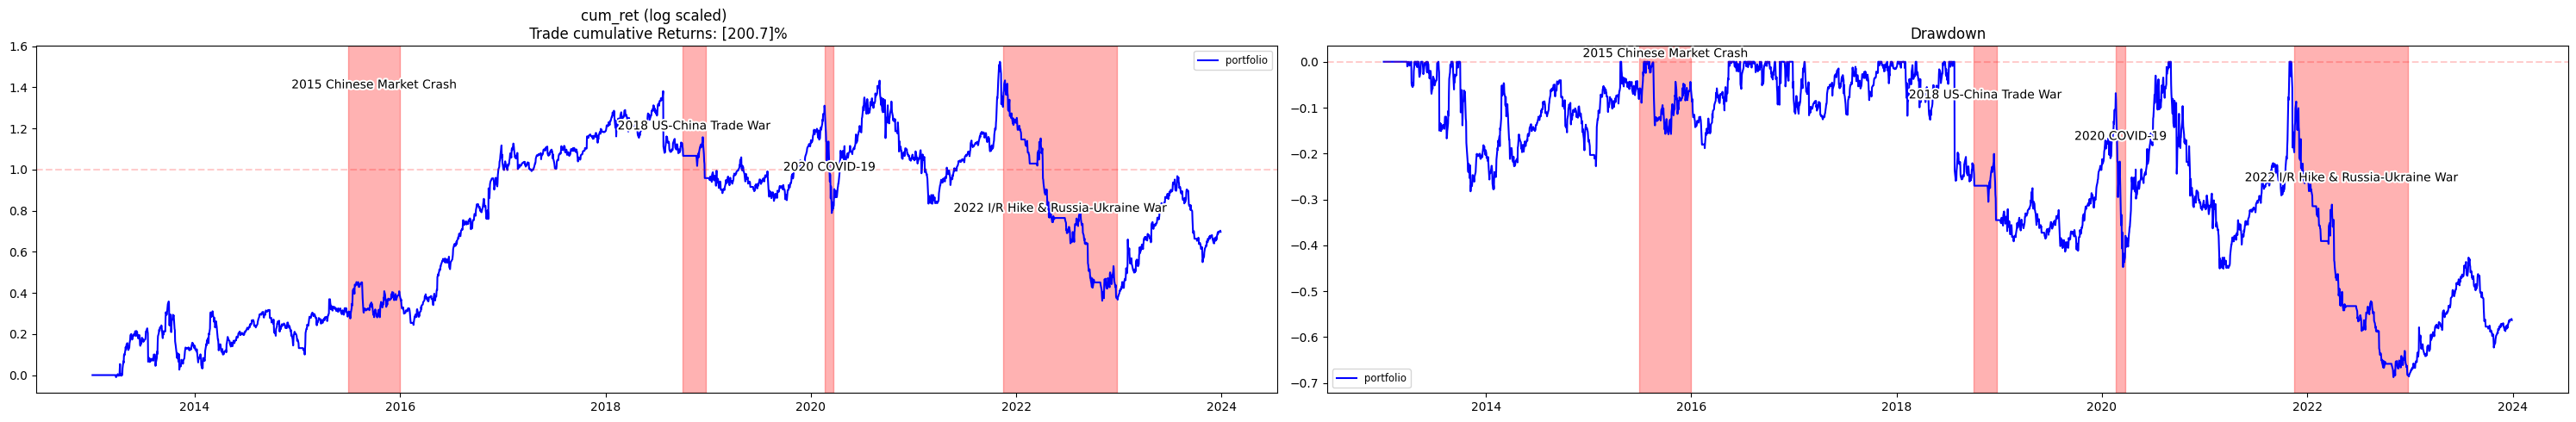

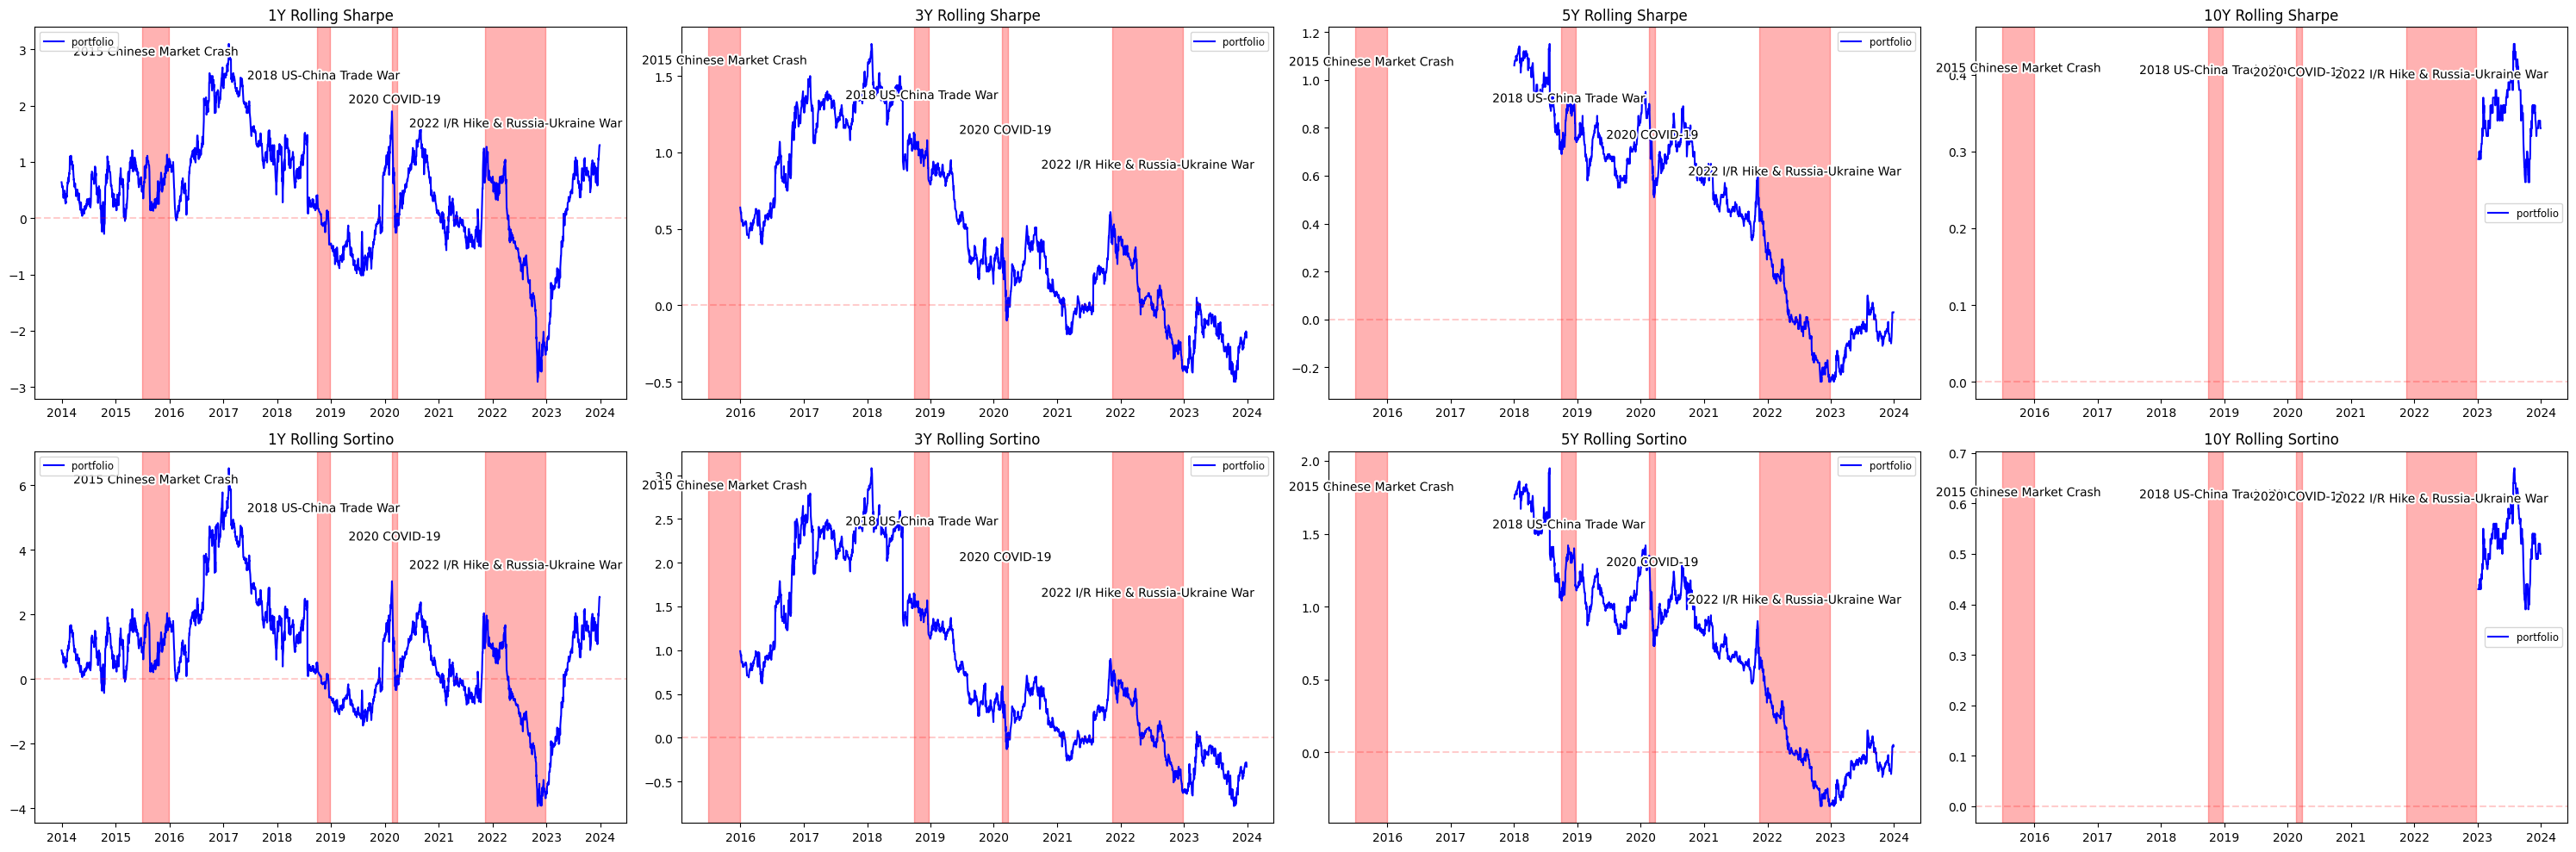

In [8]:
bt = Backtest.backtest(
    init_capital = 10_000,
    pl_df = trade.pl_df,
    tickers = tickers_list,
    slippage = 0.0,
    downside_risk = 0,
    metric = ['Annualized Return', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Volatility'],
    chart = True,
    timeframe = [1, 3, 5, 10]
)

bt.run()
bt.generate_performance()
bt.generate_report()